In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [5]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [7]:
orig_inputs

array([[0.7281861 , 0.15469257, 0.73255167, 0.69399651, 0.05640131],
       [0.24238435, 0.84409997, 0.5778091 , 0.67902128, 0.50195289],
       [0.72952261, 0.7481062 , 0.67977464, 0.35655228, 0.67105368],
       [0.77062024, 0.11440374, 0.04677993, 0.64832428, 0.27354905],
       [0.6188123 , 0.33180214, 0.18728787, 0.75623847, 0.3288348 ],
       [0.78495809, 0.91068235, 0.7081201 , 0.95922543, 0.0049115 ],
       [0.14511079, 0.8966846 , 0.89632223, 0.72627154, 0.23627199],
       [0.94506907, 0.28845905, 0.97880576, 0.96165559, 0.59801594],
       [0.12572016, 0.86272469, 0.02854433, 0.24660527, 0.75120624],
       [0.75759436, 0.35583141, 0.0165229 , 0.4342072 , 0.11243304],
       [0.5367969 , 0.30878091, 0.41187929, 0.38822518, 0.5225283 ],
       [0.95773967, 0.23566857, 0.09914585, 0.15680593, 0.07131737],
       [0.6293079 , 0.80348368, 0.81140844, 0.04561319, 0.11062446],
       [0.02173531, 0.42808424, 0.83593944, 0.48948866, 0.51108173],
       [0.43934426, 0.69892383, 0.

In [9]:
# Add the new data points
new_data = np.array([[0.075861, 0.903767, 0.204257, 0.853818, 0.74198],
                     [0.73045 , 0.109103, 0.407669, 0.060159, 0.171911],
                     [0.735173, 0.627324, 0.132169, 0.673756, 0.421447],
                     [0.715148, 0.680068, 0.164497, 0.934029, 0.778474],
                     [0.601506, 0.198114, 0.781321, 0.893804, 0.711879]])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(20, 25)

In [11]:
orig_outputs

array([-0.71426495, -1.20995524, -1.67219994, -1.53605771, -0.82923655,
       -1.24704893, -1.23378638, -1.69434344, -2.57116963, -1.30911635,
       -1.14478485, -1.91267714, -1.62283895, -1.35668211, -2.0184254 ,
       -1.70255784, -1.29424696, -0.93575656, -2.15576776, -1.74688209])

In [13]:
outputs = np.append(orig_outputs, -2.100544598338089)
outputs = np.append(outputs, -1.657356980201489)
outputs = np.append(outputs, -1.5287827273770374)
outputs = np.append(outputs, -1.8944735805418544)
outputs = np.append(outputs, -1.3584921328939115)
len(outputs)

25

In [15]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'feature4': orig_inputs[:,3],
             'feature5': orig_inputs[:,4],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,feature3,feature4,feature5,target
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


In [17]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'feature5': inputs[:,4],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,feature4,feature5,target
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


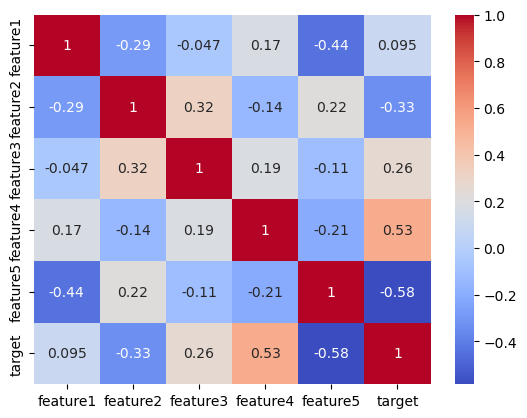

In [19]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

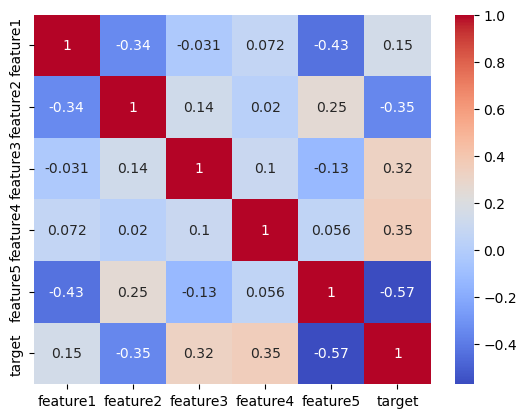

In [21]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  25 non-null     float64
 1   feature2  25 non-null     float64
 2   feature3  25 non-null     float64
 3   feature4  25 non-null     float64
 4   feature5  25 non-null     float64
 5   target    25 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


In [25]:
orig_df.describe()

,feature1,feature2,feature3,feature4,feature5,target
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.547765,0.562570,0.467217,0.534433,0.423745,-1.495390
std,0.303015,0.283617,0.315292,0.280259,0.297199,0.460664
min,0.021735,0.114404,0.016523,0.045613,0.004911,-2.571170
25%,0.254775,0.304453,0.165252,0.329066,0.111981,-1.713639
50%,0.624060,0.617630,0.435052,0.621691,0.506517,-1.446370
75%,0.773685,0.813638,0.714228,0.710318,0.628985,-1.227829
max,0.957740,0.931871,0.978806,0.961656,0.892819,-0.714265


In [27]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,target
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.552538,0.550791,0.441370,0.564169,0.452024,-1.537898
std,0.293404,0.288512,0.306004,0.296186,0.290959,0.435814
min,0.021735,0.109103,0.016523,0.045613,0.004911,-2.571170
25%,0.258906,0.291470,0.164497,0.356552,0.171911,-1.746882
50%,0.629308,0.627324,0.414876,0.673756,0.511082,-1.536058
75%,0.757594,0.803484,0.708120,0.756238,0.711879,-1.247049
max,0.957740,0.931871,0.978806,0.961656,0.892819,-0.714265


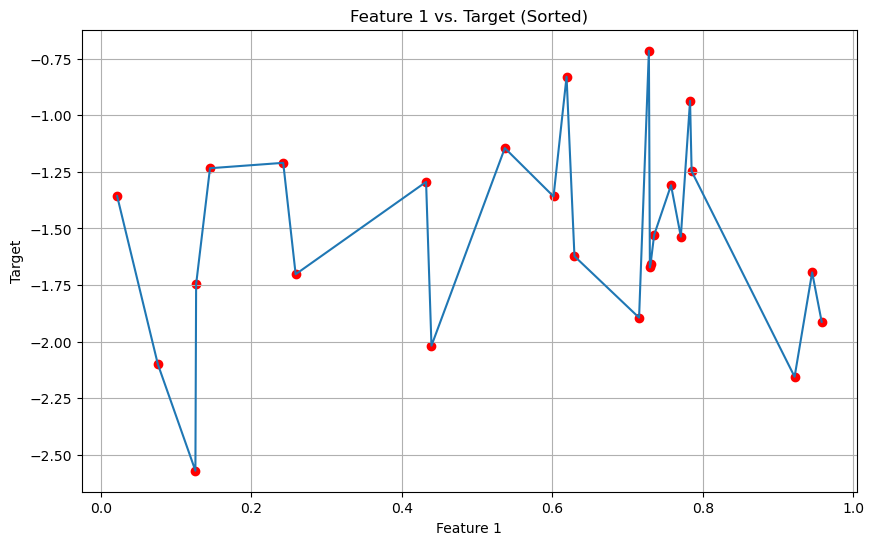

In [29]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

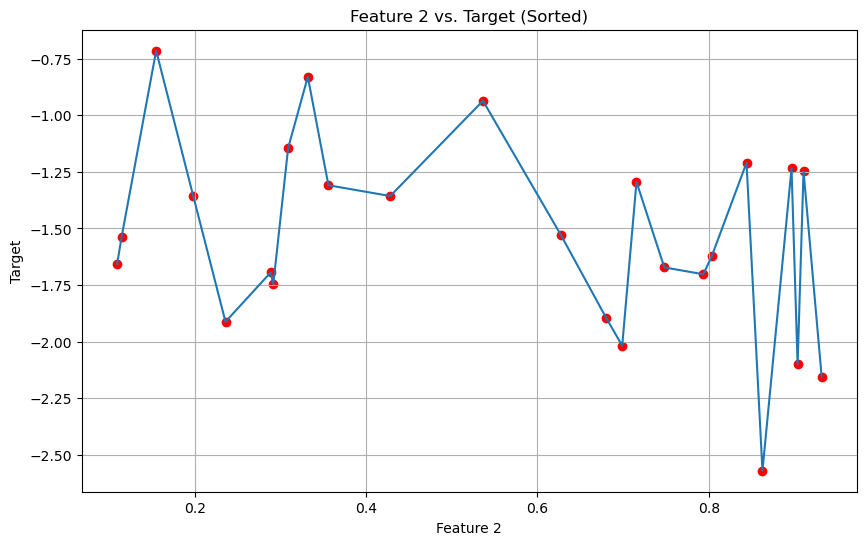

In [31]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

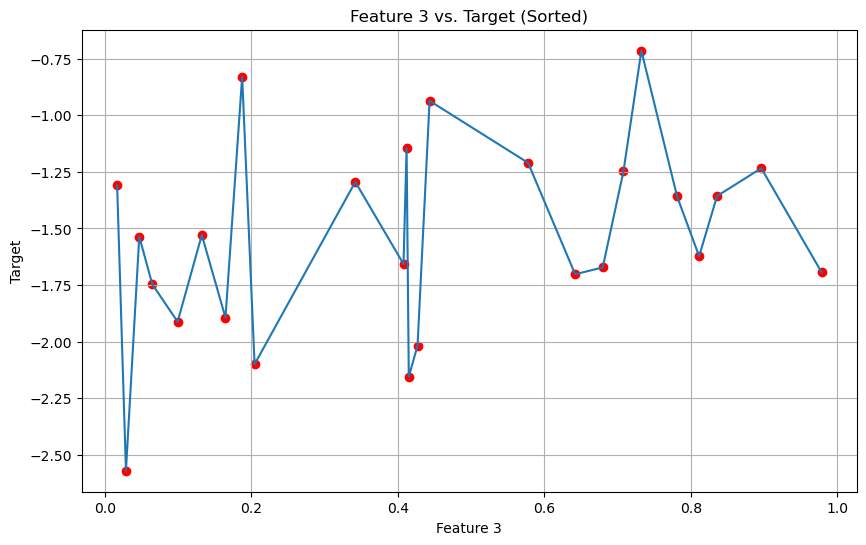

In [33]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

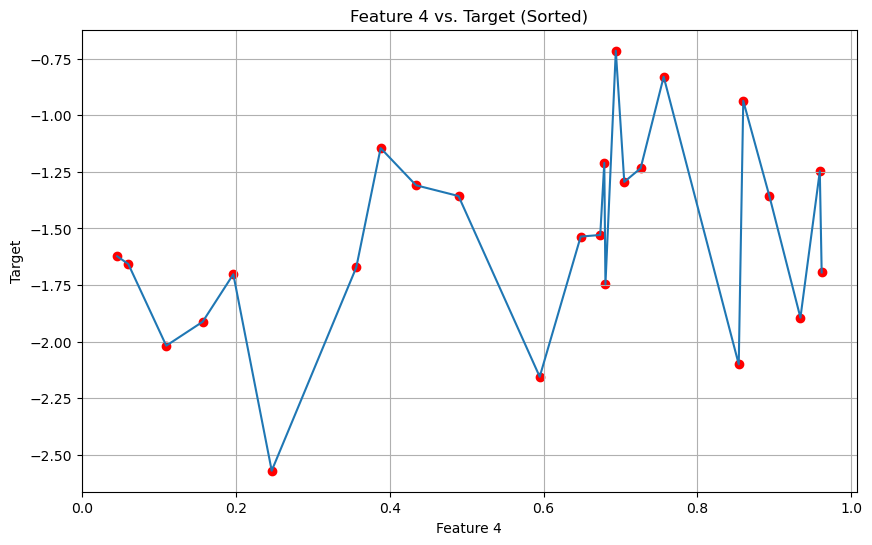

In [35]:
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target (Sorted)')
plt.grid(True)
plt.show()

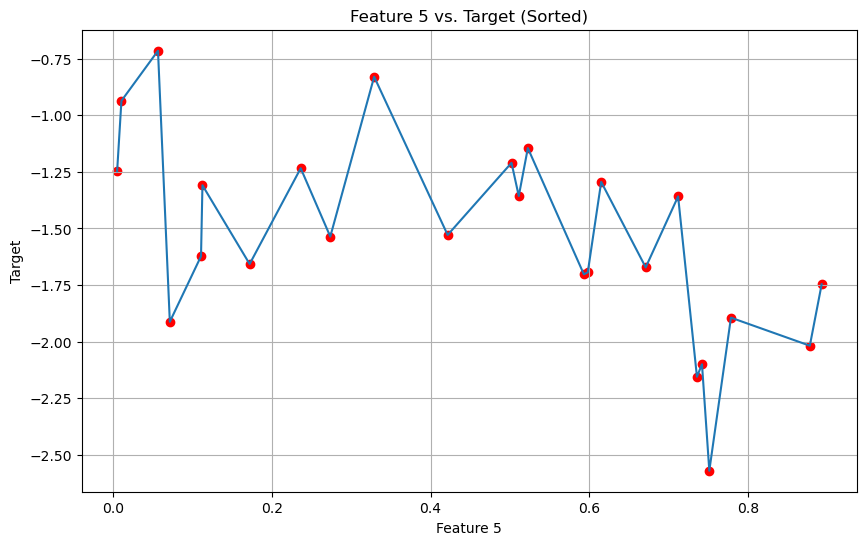

In [37]:
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [39]:
print('Running......')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2],
#    'n_restarts_optimizer': [5, 9, 10, 15, 20],
#    'normalize_y': [True],
#}
param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Prepare the data
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running......


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

Best parameters: {'alpha': 1e-05, 'kernel': 1**2 * RBF(length_scale=10), 'n_restarts_optimizer': 9, 'normalize_y': True}
Best score: -0.12395355579785212


GaussianProcessRegressor(alpha=1e-05, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9, normalize_y=True)

In [41]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(alpha=1e-05, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


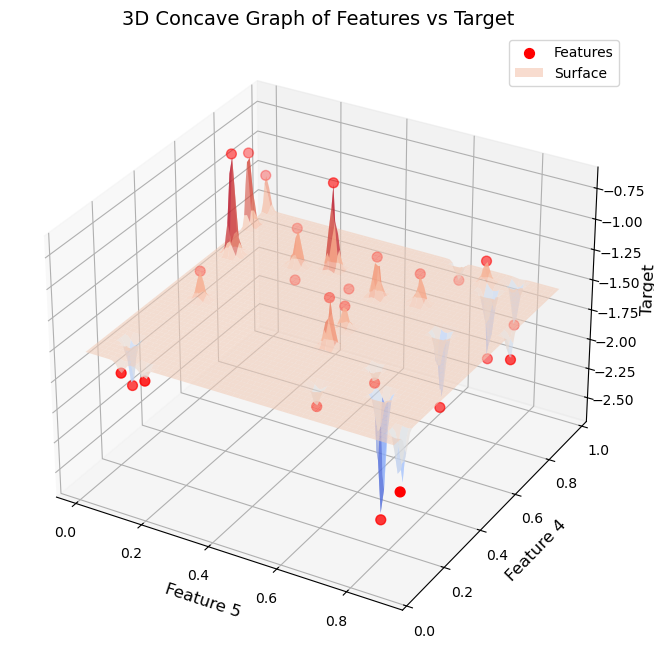

In [43]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature5'], df['feature4'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature5'].min(), df['feature5'].max(), 100),
                   np.linspace(df['feature4'].min(), df['feature4'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature5', 'feature4']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 5', fontsize=12)
ax.set_ylabel('Feature 4', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

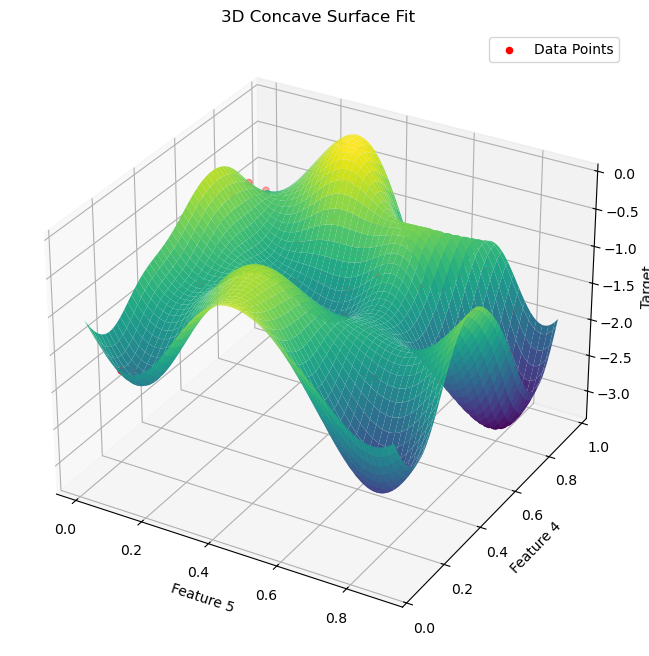

In [45]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature5']
feature2 = df['feature4']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 5')
ax.set_ylabel('Feature 4')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

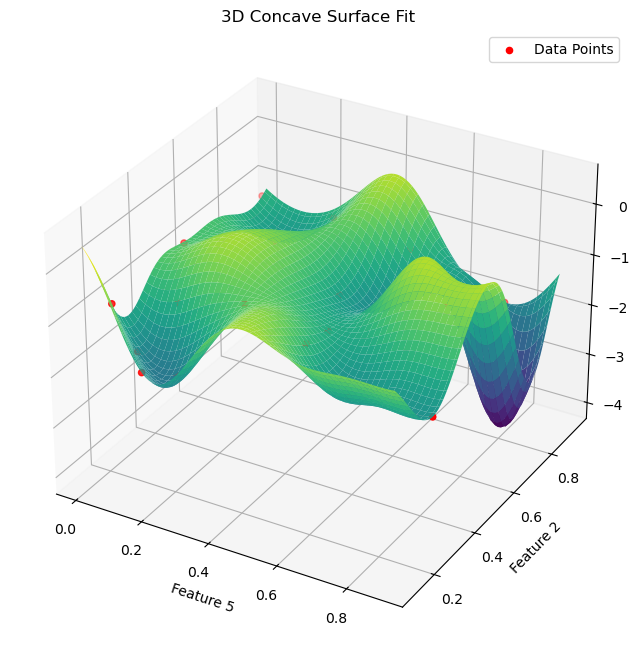

In [47]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature5']
feature2 = df['feature2']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 5')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

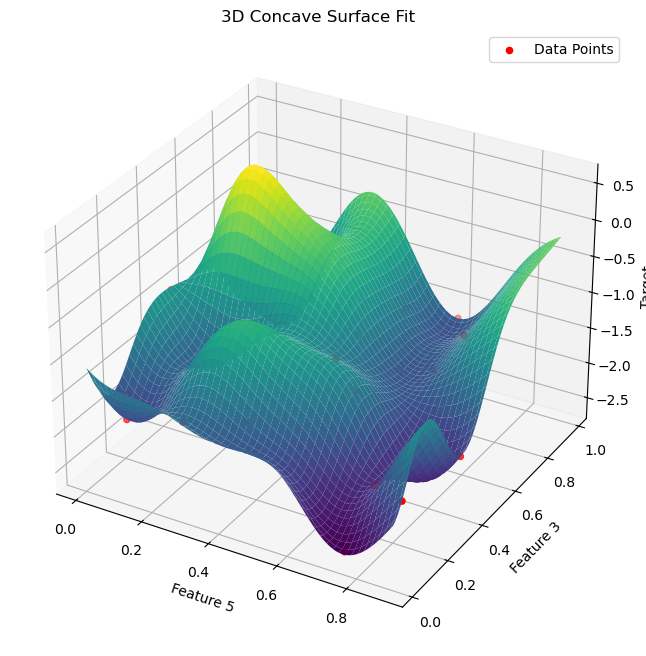

In [49]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature5']
feature2 = df['feature3']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 5')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


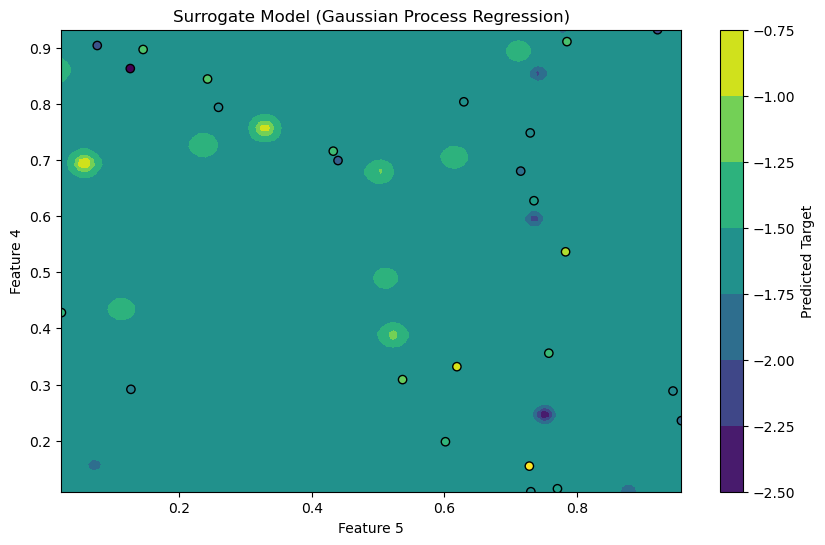

In [51]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature5', 'feature4']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 5')
plt.ylabel('Feature 4')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


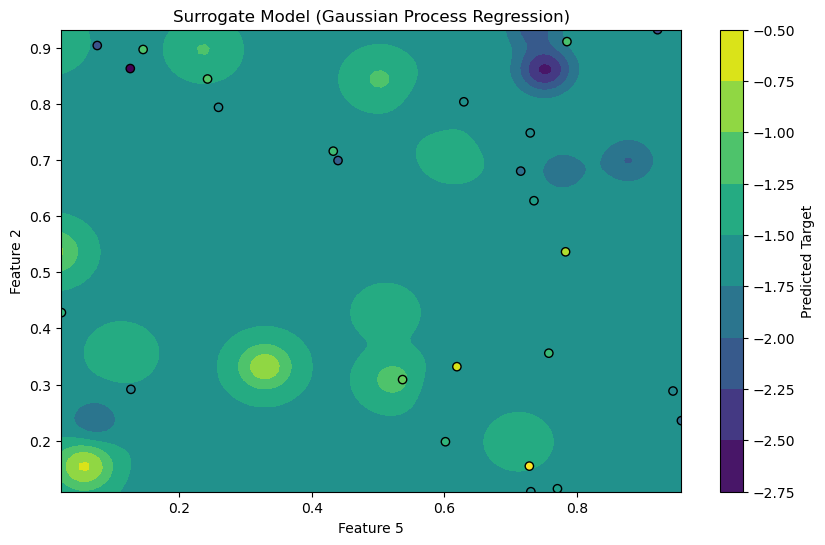

In [53]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature5', 'feature2']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 5')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


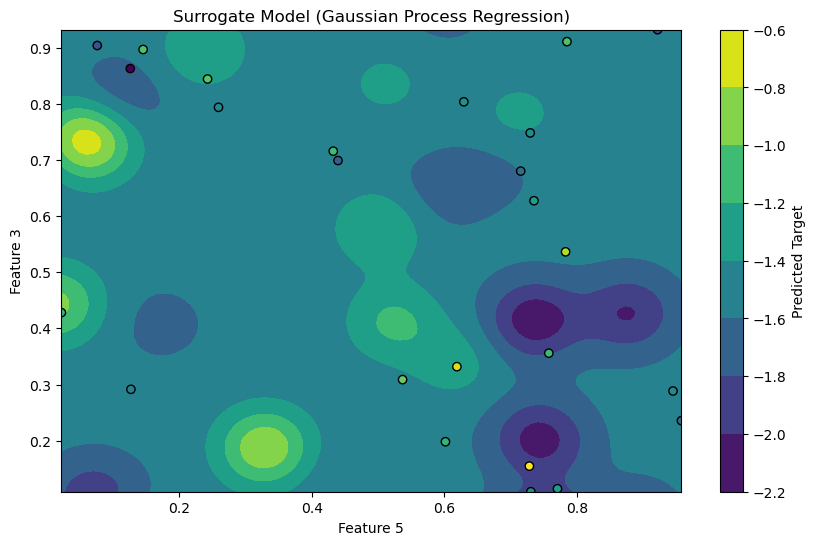

In [55]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature5', 'feature3']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 5')
plt.ylabel('Feature 3')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


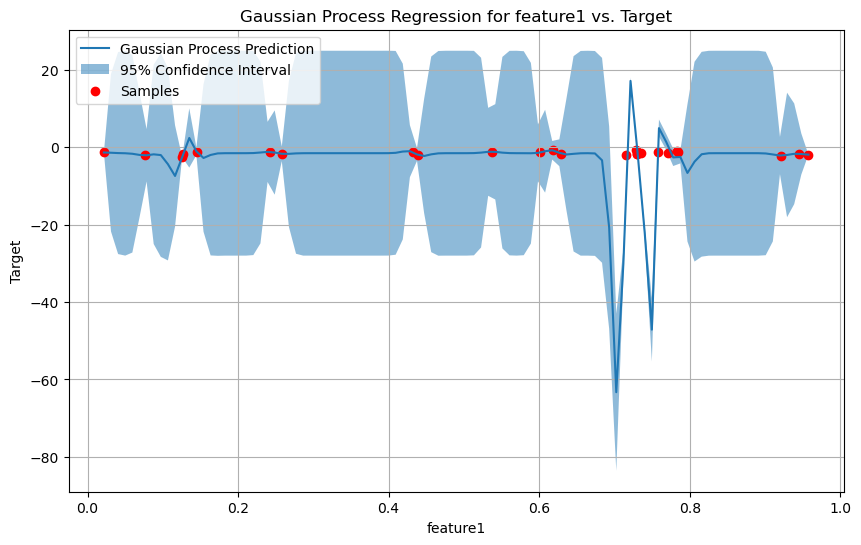

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


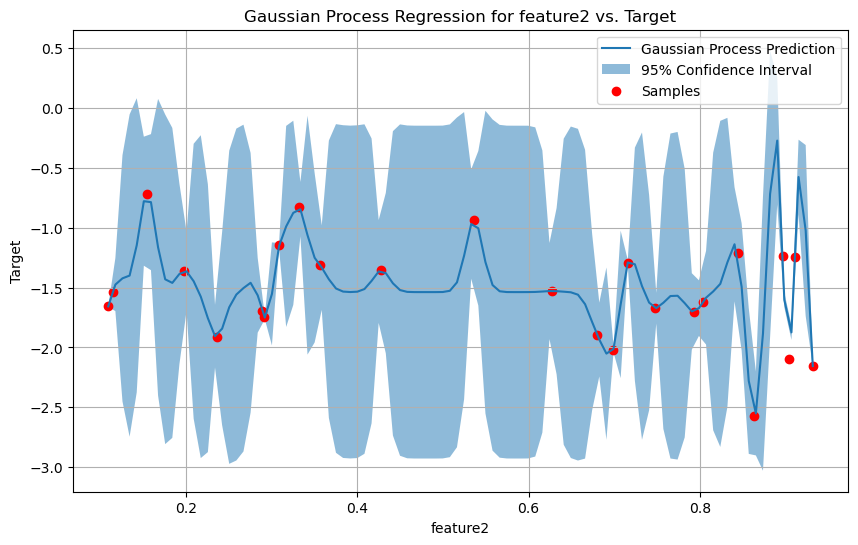

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


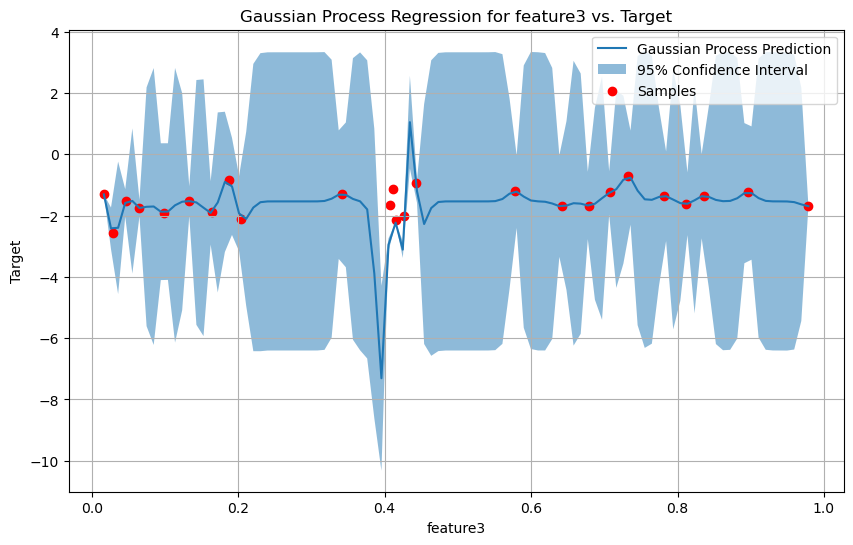

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


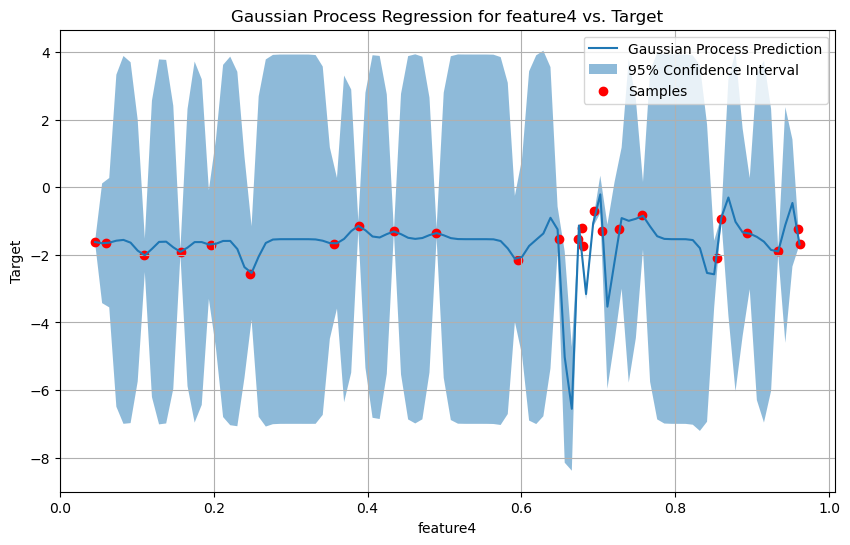

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


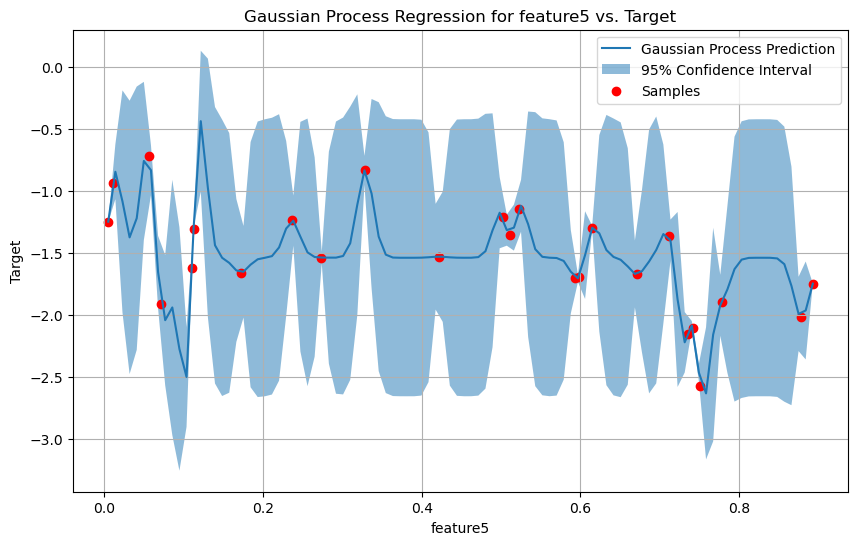

In [57]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    # Sort the DataFrame by the current feature
    df_sorted = df.sort_values(feature)

    # Prepare the data for Gaussian Process Regression
    X = df_sorted[[feature]]
    y = df_sorted['target']

    # Define the kernel
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_pred, y_pred, label='Gaussian Process Prediction')
    plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.5, label='95% Confidence Interval')
    plt.scatter(X, y, color='red', label='Samples')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'Gaussian Process Regression for {feature} vs. Target')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


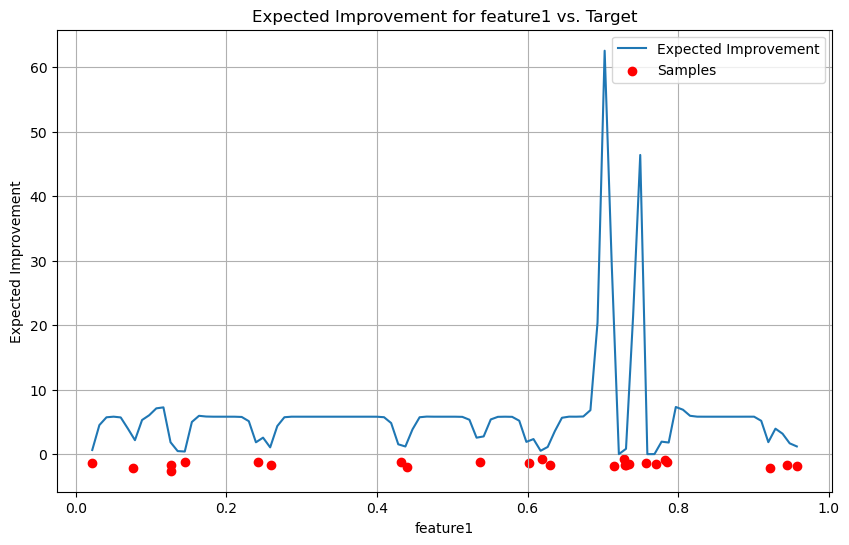

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


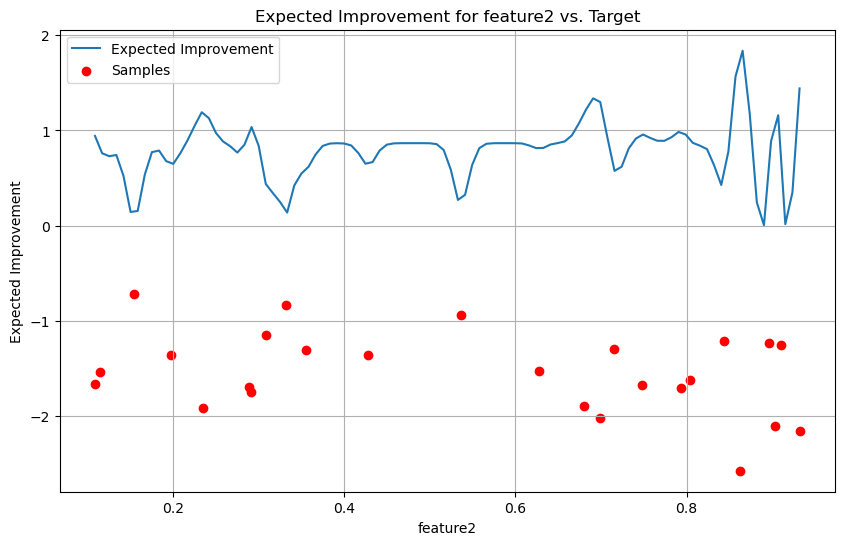

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


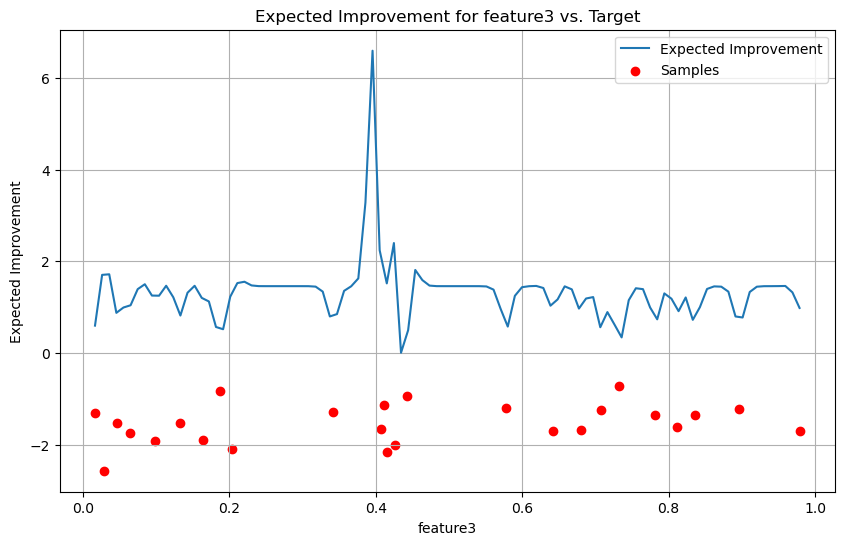

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


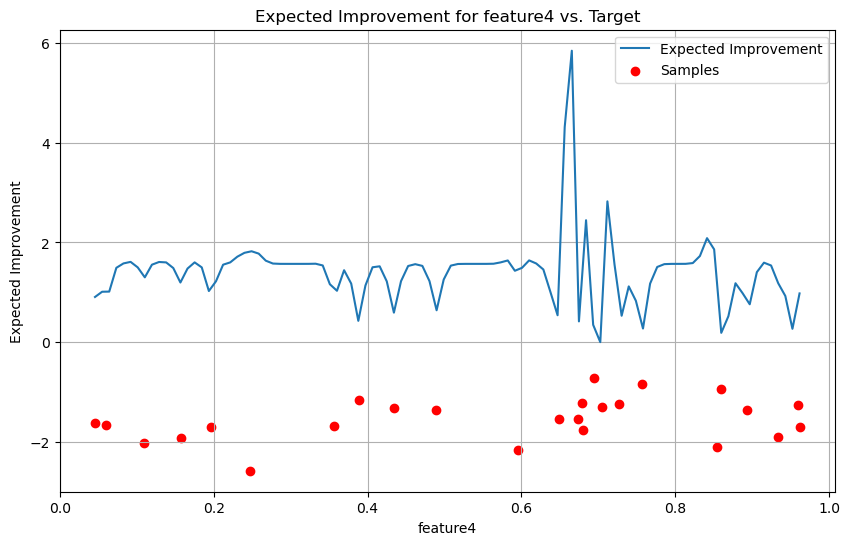

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


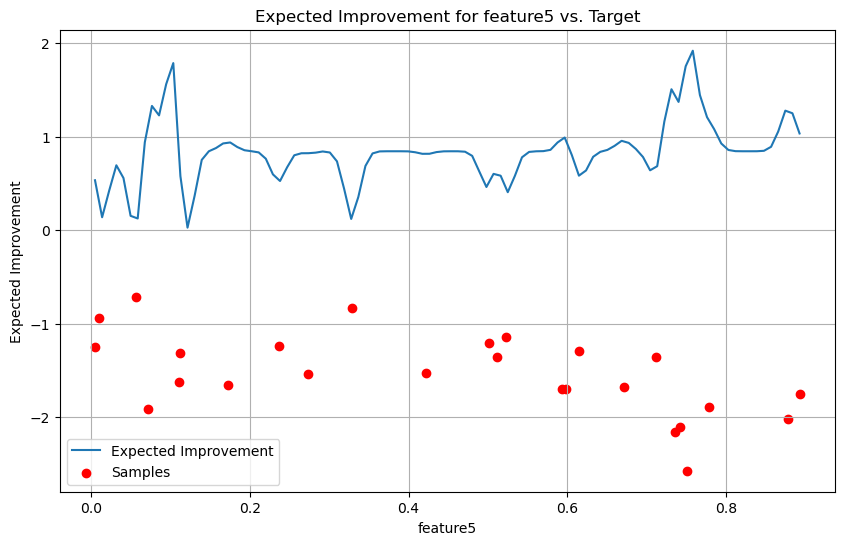

In [59]:
# Expected Improvement Calculation and Plotting

from scipy.stats import norm

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    # Sort the DataFrame by the current feature
    df_sorted = df.sort_values(feature)

    # Prepare the data for Gaussian Process Regression
    X = df_sorted[[feature]]
    y = df_sorted['target']

    # Define the kernel
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Expected Improvement
    mu_s = np.max(y) #current best
    ei = (mu_s - y_pred) * norm.cdf((mu_s - y_pred) / sigma) + sigma * norm.pdf((mu_s - y_pred) / sigma)
    
    #Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_pred, ei, label='Expected Improvement')
    plt.scatter(X, y, color='red', label='Samples')
    plt.xlabel(feature)
    plt.ylabel('Expected Improvement')
    plt.title(f'Expected Improvement for {feature} vs. Target')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


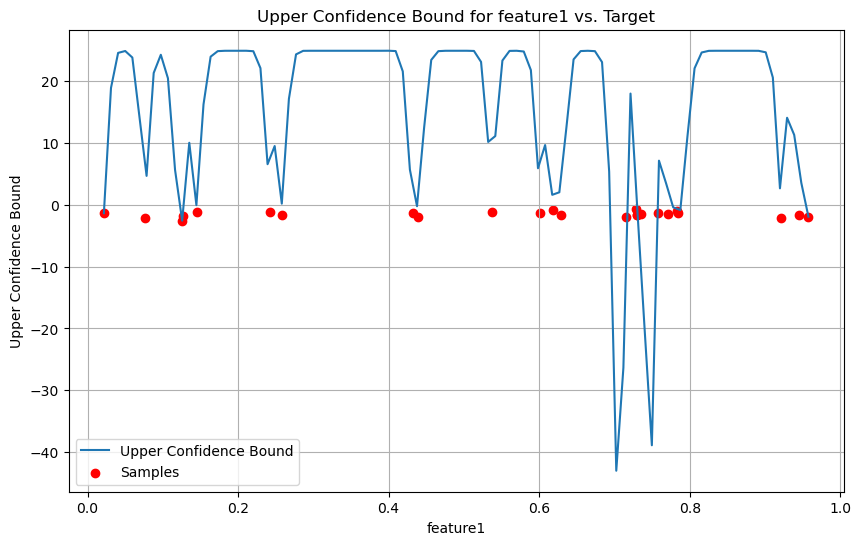

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


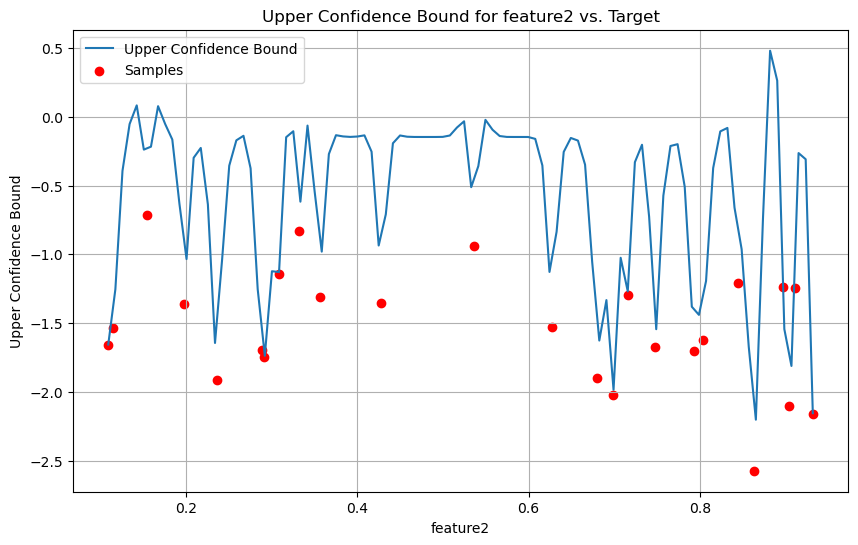

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


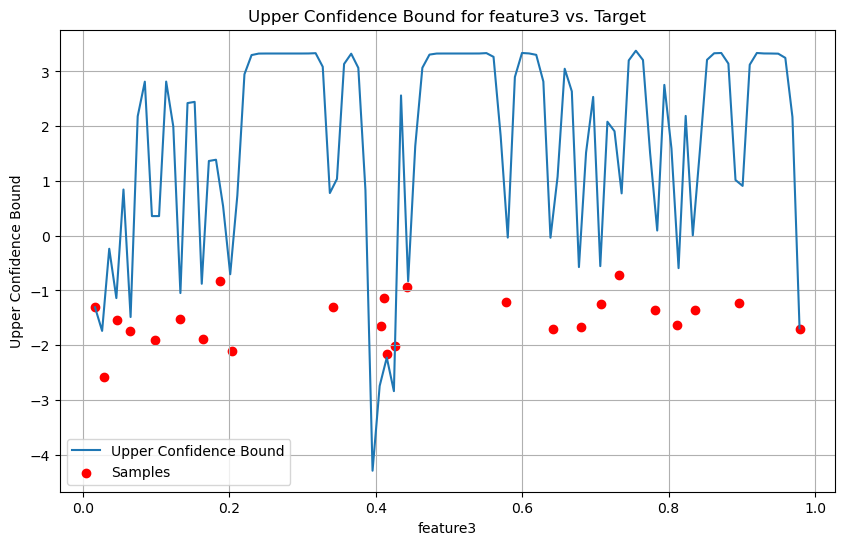

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


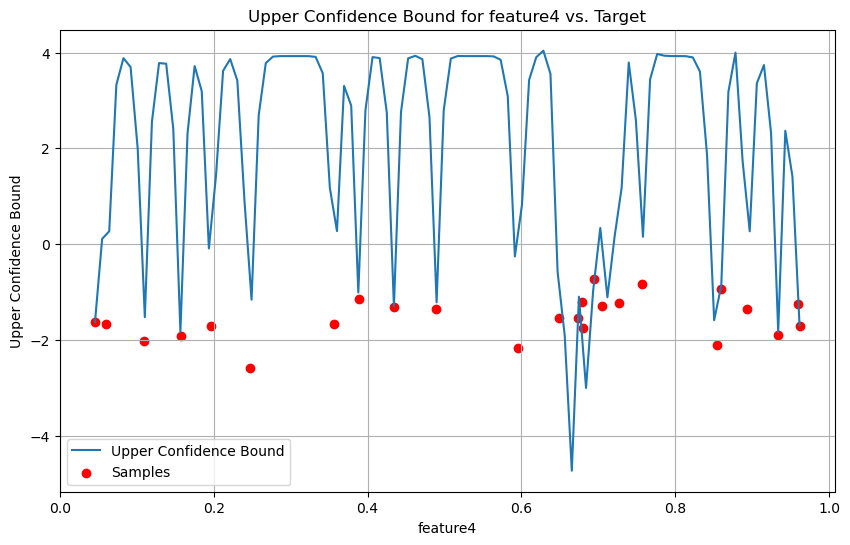

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


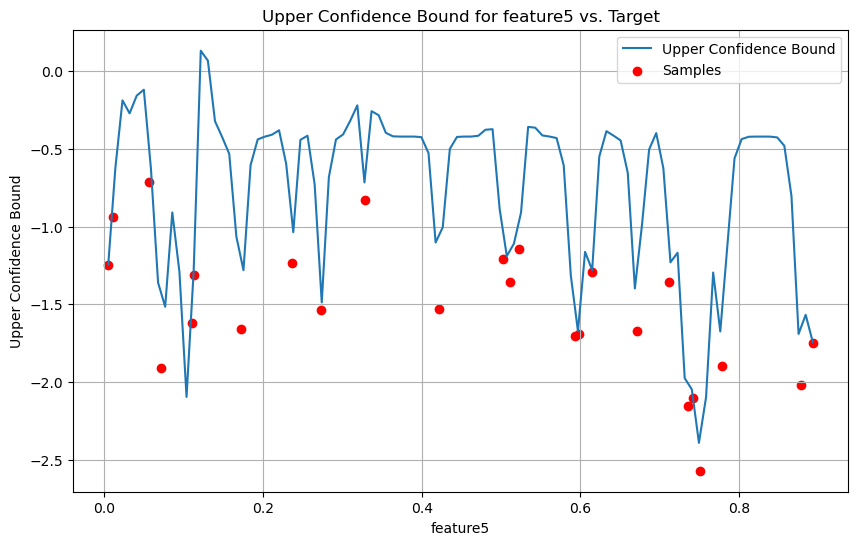

In [61]:
from scipy.stats import norm

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    # Sort the DataFrame by the current feature
    df_sorted = df.sort_values(feature)

    # Prepare the data for Gaussian Process Regression
    X = df_sorted[[feature]]
    y = df_sorted['target']

    # Define the kernel
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Upper Confidence Bound
    upper_confidence_bound = y_pred + 1.96 * sigma

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(x_pred, upper_confidence_bound, label='Upper Confidence Bound')
    plt.scatter(X, y, color='red', label='Samples')
    plt.xlabel(feature)
    plt.ylabel('Upper Confidence Bound')
    plt.title(f'Upper Confidence Bound for {feature} vs. Target')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


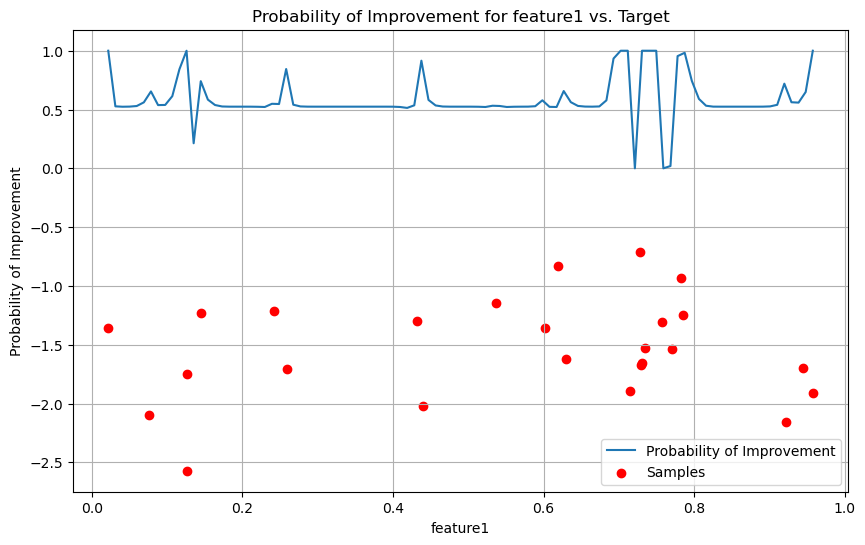

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


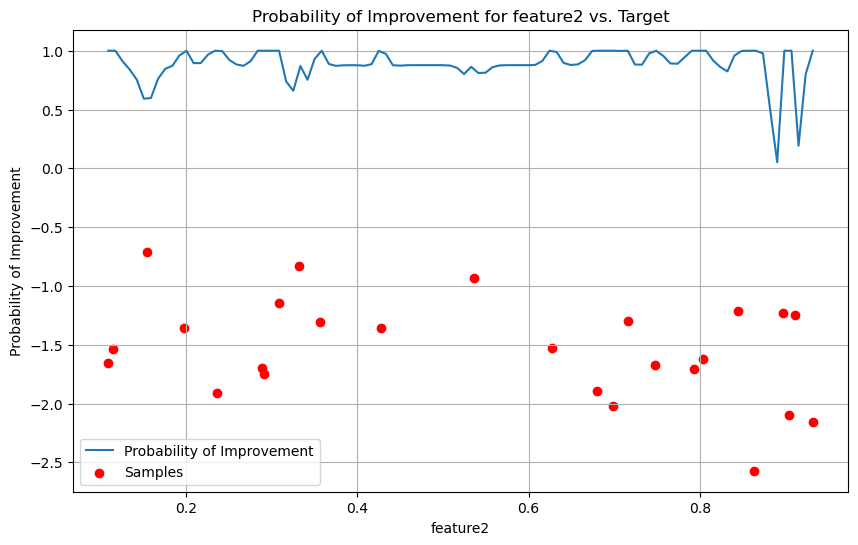

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


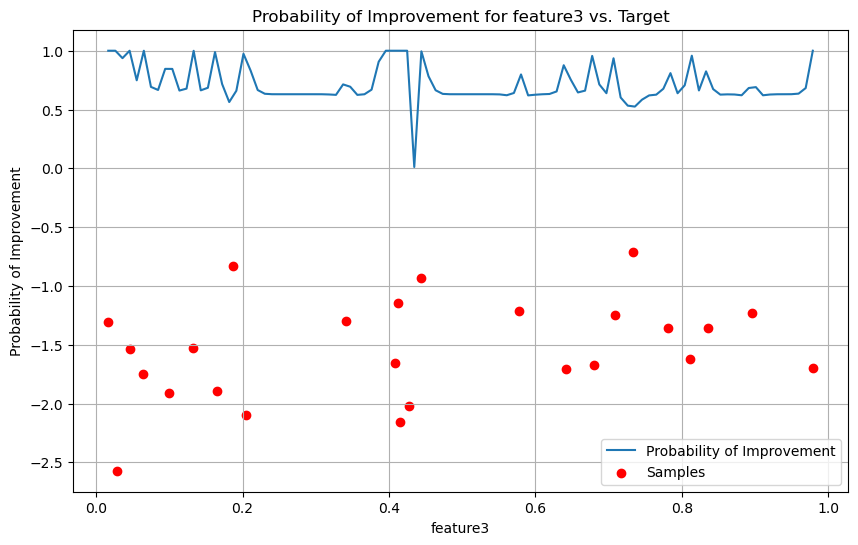

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


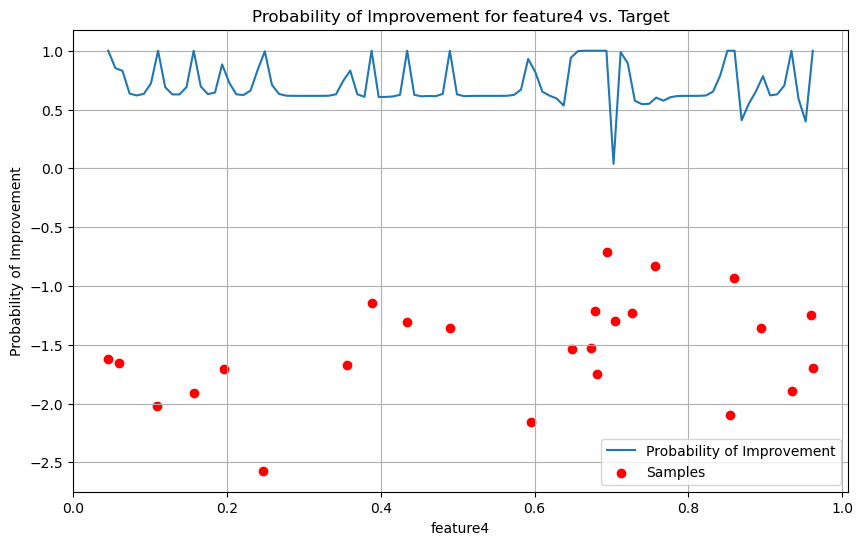

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


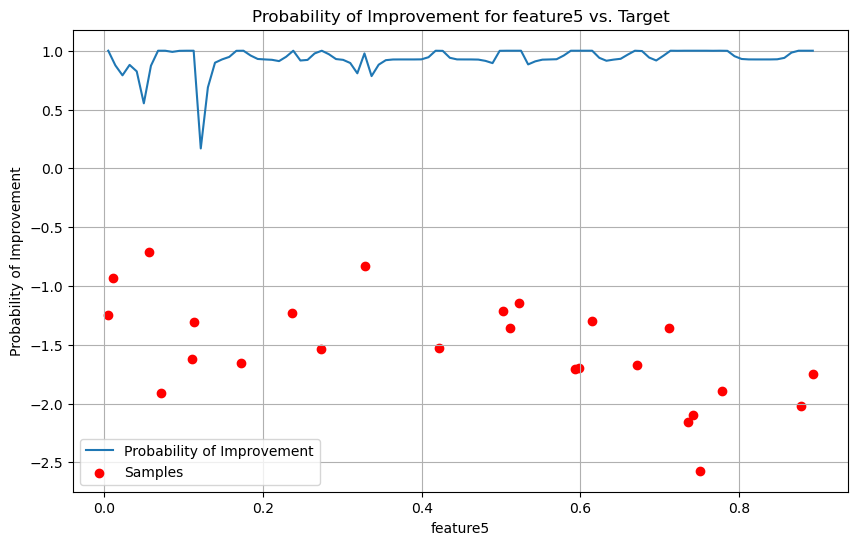

In [63]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    # Sort the DataFrame by the current feature
    df_sorted = df.sort_values(feature)

    # Prepare the data for Gaussian Process Regression
    X = df_sorted[[feature]]
    y = df_sorted['target']

    # Define the kernel
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Probability of Improvement
    mu_s = np.max(y)  # current best
    pi = norm.cdf((mu_s - y_pred) / sigma)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_pred, pi, label='Probability of Improvement')
    plt.scatter(X, y, color='red', label='Samples')
    plt.xlabel(feature)
    plt.ylabel('Probability of Improvement')
    plt.title(f'Probability of Improvement for {feature} vs. Target')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


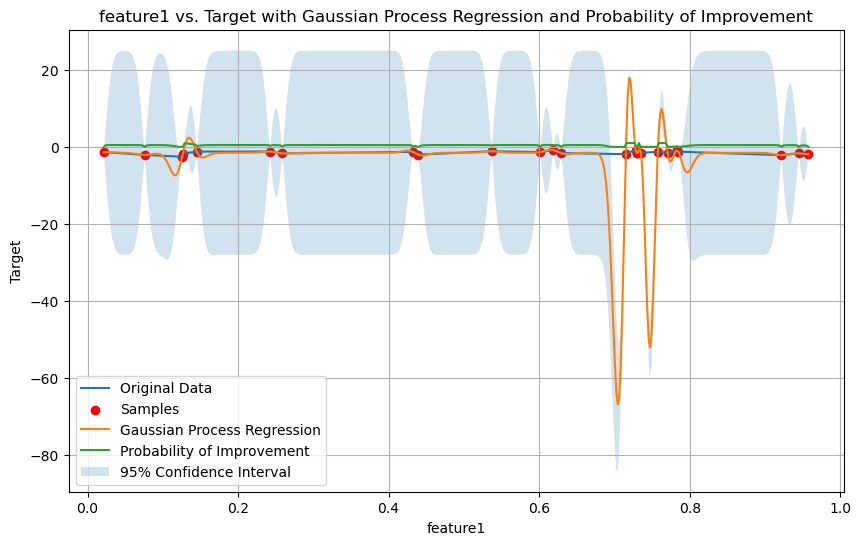

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


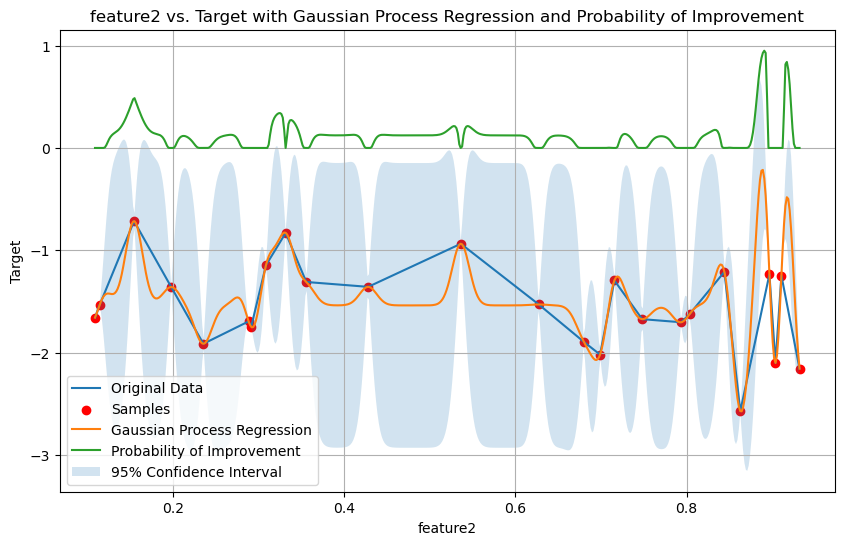

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


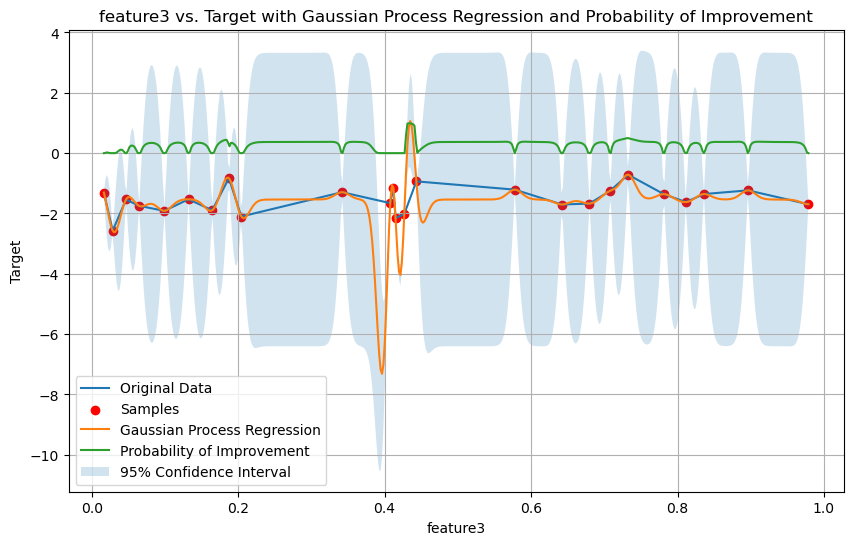

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


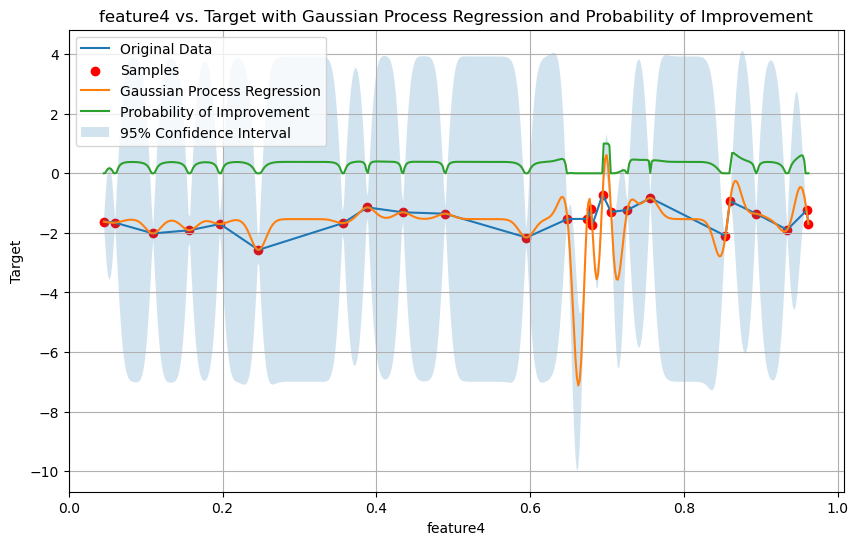

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


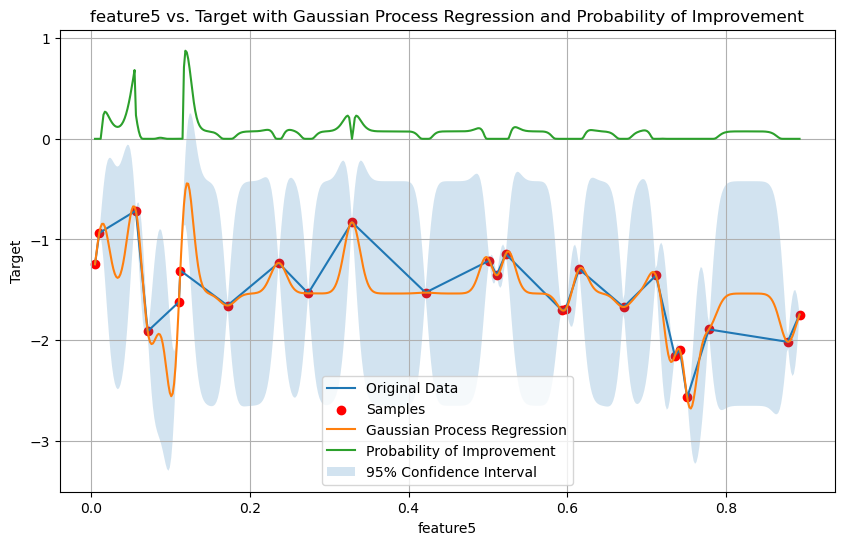

In [65]:
from scipy.stats import norm

# Assuming df is already defined as in your provided code

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement (PI)
    y_best = np.max(y)  # Current best observed target value
    pi = norm.cdf((y_pred - y_best) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, pi, label='Probability of Improvement') #Plot PI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Probability of Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

In [67]:
# Assuming 'df', 'gp', 'x_pred', 'y_pred', and 'sigma' are already defined from the previous code.

def find_best_feature1(df, gpr):
    """
    Finds the new feature1 data point that maximizes EI, UCB, and PI.
    """
    
    X = df[['feature1']]
    y = df['target']

    # Define the kernel (same as before)
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor (same as before)
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty (same as before)
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Expected Improvement
    mu_s = np.max(y)  # current best
    ei = (mu_s - y_pred) * norm.cdf((mu_s - y_pred) / sigma) + sigma * norm.pdf((mu_s - y_pred) / sigma)

    # Calculate Upper Confidence Bound
    ucb = y_pred + 1.96 * sigma

    # Calculate Probability of Improvement
    pi = norm.cdf((mu_s - y_pred) / sigma)

    # Find the index that maximizes the sum of EI, UCB, and PI
    best_index = np.argmax(ei + ucb + pi)
    best_feature1 = x_pred[best_index][0]

    return best_feature1

# Example usage:
best_feature1_value = find_best_feature1(df, gpr)
print(f"The best new feature1 value is: {best_feature1_value}")

The best new feature1 value is: 0.39991888795452957


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [69]:
def find_best_feature2(df, gpr):
    """
    Finds the new feature2 data point that maximizes EI, UCB, and PI.
    """
    
    X = df[['feature2']]
    y = df['target']

    # Define the kernel (same as before)
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor (same as before)
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty (same as before)
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Expected Improvement
    mu_s = np.max(y)  # current best
    ei = (mu_s - y_pred) * norm.cdf((mu_s - y_pred) / sigma) + sigma * norm.pdf((mu_s - y_pred) / sigma)

    # Calculate Upper Confidence Bound
    ucb = y_pred + 1.96 * sigma

    # Calculate Probability of Improvement
    pi = norm.cdf((mu_s - y_pred) / sigma)

    # Find the index that maximizes the sum of EI, UCB, and PI
    best_index = np.argmax(ei + ucb + pi)
    best_feature2 = x_pred[best_index][0]

    return best_feature2

# Example usage:
best_feature2_value = find_best_feature2(df, gpr)
print(f"The best new feature2 value is: {best_feature2_value}")

The best new feature2 value is: 0.4830885528015912


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [71]:
def find_best_feature3(df, gpr):
    """
    Finds the new feature3 data point that maximizes EI, UCB, and PI.
    """
    
    X = df[['feature3']]
    y = df['target']

    # Define the kernel (same as before)
    kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor (same as before)
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty (same as before)
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Expected Improvement
    mu_s = np.max(y)  # current best
    ei = (mu_s - y_pred) * norm.cdf((mu_s - y_pred) / sigma) + sigma * norm.pdf((mu_s - y_pred) / sigma)

    # Calculate Upper Confidence Bound
    ucb = y_pred + 1.96 * sigma

    # Calculate Probability of Improvement
    pi = norm.cdf((mu_s - y_pred) / sigma)

    # Find the index that maximizes the sum of EI, UCB, and PI
    best_index = np.argmax(ei + ucb + pi)
    best_feature3 = x_pred[best_index][0]

    return best_feature3

# Example usage:
best_feature3_value = find_best_feature3(df, gpr)
print(f"The best new feature3 value is: {best_feature3_value}")

The best new feature3 value is: 0.9302056189200665


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [73]:
def find_best_feature4(df, gpr):
    """
    Finds the new feature4 data point that maximizes EI, UCB, and PI.
    """
    
    X = df[['feature4']]
    y = df['target']

    # Define the kernel (same as before)
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor (same as before)
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty (same as before)
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Expected Improvement
    mu_s = np.max(y)  # current best
    ei = (mu_s - y_pred) * norm.cdf((mu_s - y_pred) / sigma) + sigma * norm.pdf((mu_s - y_pred) / sigma)

    # Calculate Upper Confidence Bound
    ucb = y_pred + 1.96 * sigma

    # Calculate Probability of Improvement
    pi = norm.cdf((mu_s - y_pred) / sigma)

    # Find the index that maximizes the sum of EI, UCB, and PI
    best_index = np.argmax(ei + ucb + pi)
    best_feature4 = x_pred[best_index][0]

    return best_feature4

# Example usage:
best_feature4_value = find_best_feature4(df, gpr)
print(f"The best new feature4 value is: {best_feature4_value}")

The best new feature4 value is: 0.785849469586197


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [75]:
def find_best_feature5(df, gpr):
    """
    Finds the new feature5 data point that maximizes EI, UCB, and PI.
    """
    
    X = df[['feature5']]
    y = df['target']

    # Define the kernel (same as before)
    #kernel = 1.0 * RBF(1.0)

    # Create and fit the Gaussian Process Regressor (same as before)
    #gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X, y)

    # Make predictions with uncertainty (same as before)
    x_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(x_pred, return_std=True)

    # Calculate Expected Improvement
    mu_s = np.max(y)  # current best
    ei = (mu_s - y_pred) * norm.cdf((mu_s - y_pred) / sigma) + sigma * norm.pdf((mu_s - y_pred) / sigma)

    # Calculate Upper Confidence Bound
    ucb = y_pred + 1.96 * sigma

    # Calculate Probability of Improvement
    pi = norm.cdf((mu_s - y_pred) / sigma)

    # Find the index that maximizes the sum of EI, UCB, and PI
    best_index = np.argmax(ei + ucb + pi)
    best_feature5 = x_pred[best_index][0]

    return best_feature5

# Example usage:
best_feature5_value = find_best_feature5(df, gpr)
print(f"The best new feature5 value is: {best_feature5_value}")

The best new feature5 value is: 0.8569441326670957


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [77]:
# Assuming 'df', 'gp', 'x_pred', 'y_pred', and 'sigma' are already defined from the previous code.
# The functions find_best_feature1 to find_best_feature5 are already defined in the provided code

def find_best_features(df):
    """
    Finds the best values for each feature that maximize EI, UCB and PI.
    """
    best_features = {}
    for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']:
        # Dynamically call the appropriate function
        best_feature_func = globals()[f'find_best_{feature}'] #get the function from the global scope using f-string
        best_value = best_feature_func(df, gpr)  #call the function with current df and gp
        best_features[feature] = best_value
    return best_features

# Example usage:
best_values = find_best_features(df)
print(best_values)


new_data_array = np.array(list(best_values.values()))

#Format to 6 significant figures
new_data_array = np.round(new_data_array, 6)
print("New data array with 6 significant figures:", new_data_array)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specif

{'feature1': 0.39991888795452957, 'feature2': 0.4830885528015912, 'feature3': 0.9302056189200665, 'feature4': 0.785849469586197, 'feature5': 0.8569441326670957}
New data array with 6 significant figures: [0.399919 0.483089 0.930206 0.785849 0.856944]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [79]:
inputs

array([[0.7281861 , 0.15469257, 0.73255167, 0.69399651, 0.05640131],
       [0.24238435, 0.84409997, 0.5778091 , 0.67902128, 0.50195289],
       [0.72952261, 0.7481062 , 0.67977464, 0.35655228, 0.67105368],
       [0.77062024, 0.11440374, 0.04677993, 0.64832428, 0.27354905],
       [0.6188123 , 0.33180214, 0.18728787, 0.75623847, 0.3288348 ],
       [0.78495809, 0.91068235, 0.7081201 , 0.95922543, 0.0049115 ],
       [0.14511079, 0.8966846 , 0.89632223, 0.72627154, 0.23627199],
       [0.94506907, 0.28845905, 0.97880576, 0.96165559, 0.59801594],
       [0.12572016, 0.86272469, 0.02854433, 0.24660527, 0.75120624],
       [0.75759436, 0.35583141, 0.0165229 , 0.4342072 , 0.11243304],
       [0.5367969 , 0.30878091, 0.41187929, 0.38822518, 0.5225283 ],
       [0.95773967, 0.23566857, 0.09914585, 0.15680593, 0.07131737],
       [0.6293079 , 0.80348368, 0.81140844, 0.04561319, 0.11062446],
       [0.02173531, 0.42808424, 0.83593944, 0.48948866, 0.51108173],
       [0.43934426, 0.69892383, 0.

In [81]:
# Add the new data points
next_inputs = np.vstack([inputs, new_data_array])

len(next_inputs), len(inputs)

(26, 25)

In [83]:
next_inputs

array([[0.7281861 , 0.15469257, 0.73255167, 0.69399651, 0.05640131],
       [0.24238435, 0.84409997, 0.5778091 , 0.67902128, 0.50195289],
       [0.72952261, 0.7481062 , 0.67977464, 0.35655228, 0.67105368],
       [0.77062024, 0.11440374, 0.04677993, 0.64832428, 0.27354905],
       [0.6188123 , 0.33180214, 0.18728787, 0.75623847, 0.3288348 ],
       [0.78495809, 0.91068235, 0.7081201 , 0.95922543, 0.0049115 ],
       [0.14511079, 0.8966846 , 0.89632223, 0.72627154, 0.23627199],
       [0.94506907, 0.28845905, 0.97880576, 0.96165559, 0.59801594],
       [0.12572016, 0.86272469, 0.02854433, 0.24660527, 0.75120624],
       [0.75759436, 0.35583141, 0.0165229 , 0.4342072 , 0.11243304],
       [0.5367969 , 0.30878091, 0.41187929, 0.38822518, 0.5225283 ],
       [0.95773967, 0.23566857, 0.09914585, 0.15680593, 0.07131737],
       [0.6293079 , 0.80348368, 0.81140844, 0.04561319, 0.11062446],
       [0.02173531, 0.42808424, 0.83593944, 0.48948866, 0.51108173],
       [0.43934426, 0.69892383, 0.

In [85]:
next_data = {'feature1': next_inputs[:,0],
             'feature2': next_inputs[:,1],
             'feature3': next_inputs[:,2],
             'feature4': next_inputs[:,3],
             'feature5': next_inputs[:,4],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2,feature3,feature4,feature5
0,0.728186,0.154693,0.732552,0.693997,0.056401
1,0.242384,0.844100,0.577809,0.679021,0.501953
2,0.729523,0.748106,0.679775,0.356552,0.671054
3,0.770620,0.114404,0.046780,0.648324,0.273549
4,0.618812,0.331802,0.187288,0.756238,0.328835
5,0.784958,0.910682,0.708120,0.959225,0.004911
6,0.145111,0.896685,0.896322,0.726272,0.236272
7,0.945069,0.288459,0.978806,0.961656,0.598016
8,0.125720,0.862725,0.028544,0.246605,0.751206
9,0.757594,0.355831,0.016523,0.434207,0.112433


In [87]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=5)

print("New Input Data (with noise):", new_input_data)
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.39393198 0.48502043 0.92922775 0.78678585 0.85910612]
New Input Data (with noise): [0.393932, 0.48502, 0.929228, 0.786786, 0.859106]


In [89]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")

Feature 1 at peak of target: 0.7281861047460138
Feature 2 at peak of target: 0.1546925696237983
Feature 3 at peak of target: 0.7325516687239811
Feature 4 at peak of target: 0.6939965090690888
Feature 5 at peak of target: 0.056401310518258585


In [91]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")

Feature 1 at peak of target: 0.12572015503019873
Feature 2 at peak of target: 0.8627246921598651
Feature 3 at peak of target: 0.028544332231059788
Feature 4 at peak of target: 0.24660527193052817
Feature 5 at peak of target: 0.7512062409044311


In [93]:
next_inputs

array([[0.7281861 , 0.15469257, 0.73255167, 0.69399651, 0.05640131],
       [0.24238435, 0.84409997, 0.5778091 , 0.67902128, 0.50195289],
       [0.72952261, 0.7481062 , 0.67977464, 0.35655228, 0.67105368],
       [0.77062024, 0.11440374, 0.04677993, 0.64832428, 0.27354905],
       [0.6188123 , 0.33180214, 0.18728787, 0.75623847, 0.3288348 ],
       [0.78495809, 0.91068235, 0.7081201 , 0.95922543, 0.0049115 ],
       [0.14511079, 0.8966846 , 0.89632223, 0.72627154, 0.23627199],
       [0.94506907, 0.28845905, 0.97880576, 0.96165559, 0.59801594],
       [0.12572016, 0.86272469, 0.02854433, 0.24660527, 0.75120624],
       [0.75759436, 0.35583141, 0.0165229 , 0.4342072 , 0.11243304],
       [0.5367969 , 0.30878091, 0.41187929, 0.38822518, 0.5225283 ],
       [0.95773967, 0.23566857, 0.09914585, 0.15680593, 0.07131737],
       [0.6293079 , 0.80348368, 0.81140844, 0.04561319, 0.11062446],
       [0.02173531, 0.42808424, 0.83593944, 0.48948866, 0.51108173],
       [0.43934426, 0.69892383, 0.

In [95]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.393932, 0.48502, 0.929228, 0.786786, 0.859106]
